In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from collections import Counter

In [2]:
def extract(path, include_df=False):
    df = pd.concat([pd.read_csv(os.path.join(path, file)) for file in os.listdir(path)])
    features = df.iloc[0:,:-1].copy()
    labels = features.pop('agent_selected_action')
    return (np.array(features), np.array(labels)) if not include_df else (df, np.array(features), np.array(labels))

In [3]:
path = 'ftg-data/Dataset/BlackMamba/'

features, labels = extract(os.path.join(path, 'trainset'), include_df=False)

In [4]:
class_names = ['neutral', 'stand', 'forward_walk', 'dash', 'back_step', 'crouch', 'jump', 'for_jump', 'back_jump', 'air'
             , 'stand_guard', 'crouch_guard', 'air_guard', 'stand_guard_recov', 'crouch_guard_recov', 'air_guard_recov'
             , 'stand_recov', 'crouch_recov', 'air_recov', 'change_down', 'down', 'rise', 'landing', 'throw_a', 'throw_b'
             , 'throw_hit', 'throw_suffer', 'stand_a', 'stand_b', 'crouch_a', 'crouch_b', 'air_a', 'air_b', 'air_da', 'air_db'
             , 'stand_fa', 'stand_fb', 'crouch_fa', 'crouch_fb', 'air_fa', 'air_fb', 'air_ua', 'air_ub', 'stand_d_df_fa'
             , 'stand_d_df_fb', 'stand_f_d_dfa', 'stand_f_d_dfb', 'stand_d_db_ba', 'stand_d_db_bb', 'air_d_df_fa'
             , 'air_d_df_fb', 'air_f_d_dfa', 'air_f_d_dfb', 'air_d_db_ba', 'air_d_db_bb', 'stand_d_df_fc']

In [5]:
freq_counter = dict(Counter(labels))
freq = [0 if x not in freq_counter.keys() else freq_counter[x] for x in range(56)]

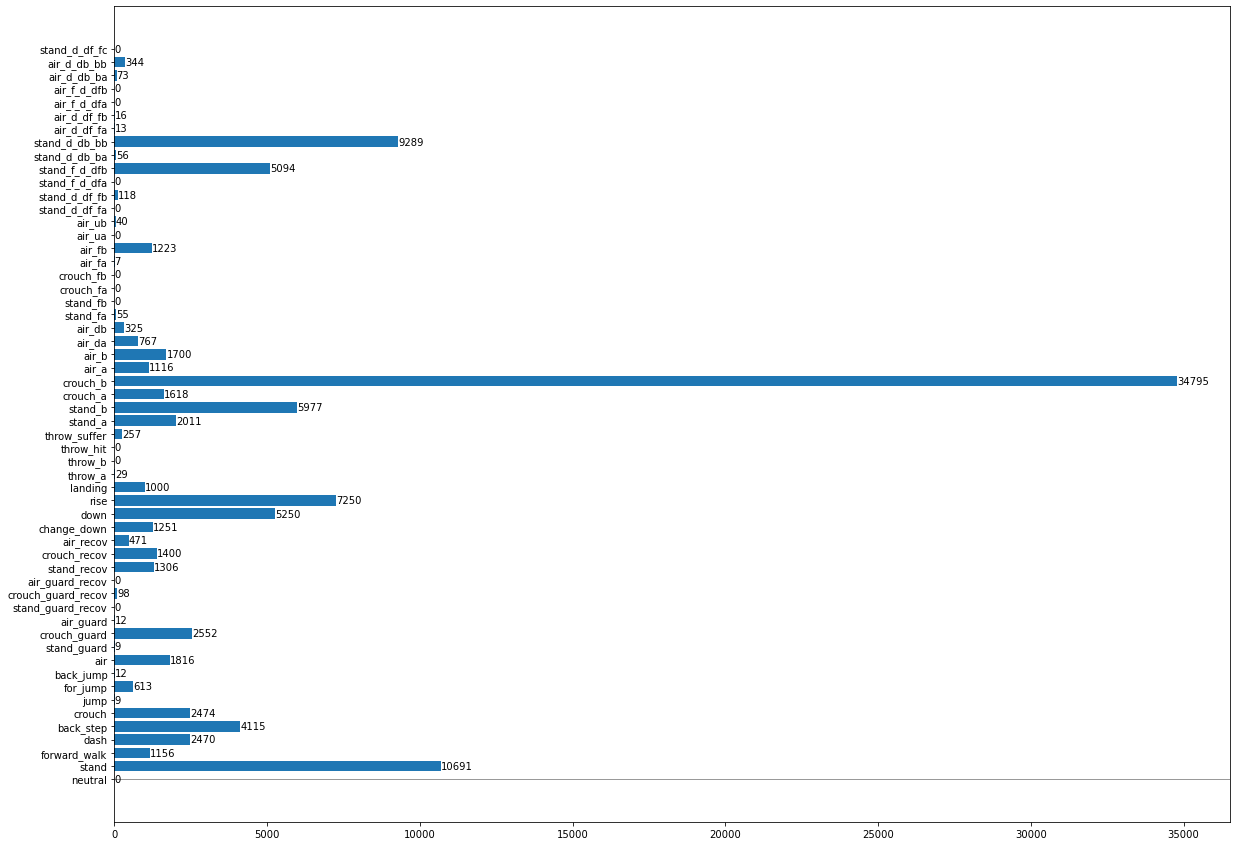

In [6]:
x = np.arange(len(class_names))
fig, ax = plt.subplots(figsize=(20, 15))

p1 = ax.barh(x, freq)

ax.axhline(0, color='grey', linewidth=0.8)
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
ax.set_yticks(x)
ax.set_yticklabels(class_names)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='edge')

plt.show()